Loading the MNIST Fashion Data Set

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Exploring the Format of the MNIST Fashion Data Set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_images)

60000

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Displaying Some MNIST Fashion Items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

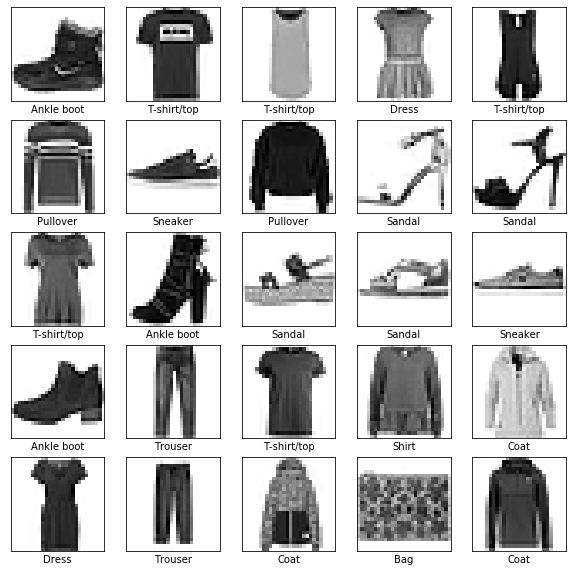

In [10]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

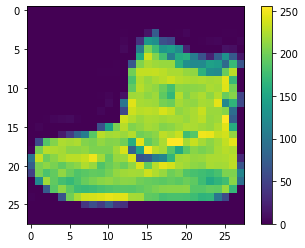

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Preprocess the Data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Underfit Model

Build the Model

In [13]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='linear')
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 2.3249 - acc: 0.1423 - val_loss: 2.2867 - val_acc: 0.1520
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2867 - acc: 0.1514 - val_loss: 2.2892 - val_acc: 0.1419
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2889 - acc: 0.1406 - val_loss: 2.2844 - val_acc: 0.1466
Epoch 4/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2855 - acc: 0.1384 - val_loss: 2.2717 - val_acc: 0.1498
Epoch 5/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.2816 - acc: 0.1397 - val_loss: 2.2784 - val_acc: 0.1428
Epoch 6/20
60000/60000 [==============================] - 3s 47us/sample - loss:

Evaluate Accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 2.2869 - acc: 0.1155
Test accuracy: 0.1155


Training/Test Loss/Accuracy During Training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

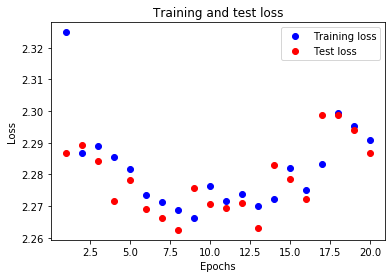

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

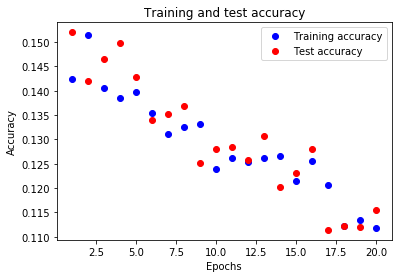

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfit Model

Build the Model

In [19]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4866 - acc: 0.8267 - val_loss: 0.4314 - val_acc: 0.8475
Epoch 2/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3639 - acc: 0.8677 - val_loss: 0.3840 - val_acc: 0.8601
Epoch 3/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3268 - acc: 0.8795 - val_loss: 0.3429 - val_acc: 0.8748
Epoch 4/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3039 - acc: 0.8876 - val_loss: 0.3516 - val_acc: 0.8741
Epoch 5/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2861 - acc: 0.8940 - val_loss: 0.3403 - val_acc: 0.8760
Epoch 6/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2693 - acc: 0.8995 - val_loss: 0.3220 - val_acc: 0.8848
Epoch 7/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2569 - acc: 0.9041 - val_loss: 0

Evaluate Accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3774 - acc: 0.8821
Test accuracy: 0.8821


Training/Test Loss/Accuracy During Training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

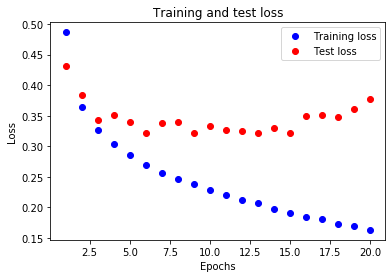

In [22]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

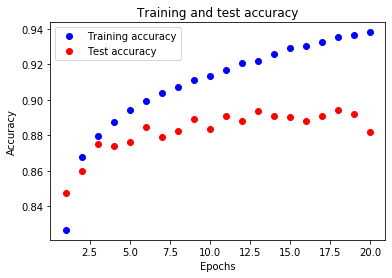

In [24]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Pretty Good Model

Build the Model

In [25]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.6109 - acc: 0.7829 - val_loss: 0.4475 - val_acc: 0.8365
Epoch 2/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4705 - acc: 0.8311 - val_loss: 0.4117 - val_acc: 0.8507
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4363 - acc: 0.8415 - val_loss: 0.4030 - val_acc: 0.8507
Epoch 4/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4170 - acc: 0.8478 - val_loss: 0.3898 - val_acc: 0.8578
Epoch 5/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4056 - acc: 0.8528 - val_loss: 0.3779 - val_acc: 0.8636
Epoch 6/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3931 - acc: 0.8564 - val_loss: 0.3704 - val_acc: 0.8686
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3818 - acc: 0.8610 - val_loss: 0.

Evaluate Accuracy

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3480 - acc: 0.8796
Test accuracy: 0.8796


Training/Test Loss/Accuracy During Training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

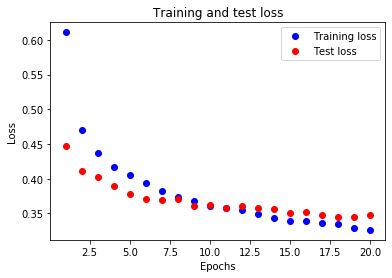

In [28]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

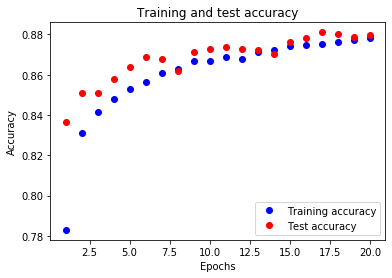

In [30]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()